El objetivo es obtener un modelo del comportamiento de un sistema de tanques de almacenamiento.

En esta proyecto se comparan diferentes métodos en el tratamiento de datos para obtener mejores resultados en el entrenamiento de un futuro modelo con redes neuronales.

In [2]:
import pandas as pd
import numpy as np

El archivo adjunto data.csv  Descargar data.csv, contiene datos ordenados por fechas de dos variables: x1 y x2. De los cuales se sabe que ninguna observación puede ser menor o igual que cero.

### 1.- Separe las variables x1 y x2 en columnas diferentes.

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6571 entries, 0 to 6570
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nombre  6571 non-null   object 
 1   Fecha   6571 non-null   object 
 2   data    6362 non-null   float64
dtypes: float64(1), object(2)
memory usage: 154.1+ KB


In [5]:
df.describe()

,data
count,6362.000000
mean,20.972573
std,32.232027
min,-73.790000
25%,3.400000
50%,9.440000
75%,25.600000
max,299.740000


In [6]:
df.head()

,nombre,Fecha,data
0,x1,2006-01-01,6.05
1,x1,2006-01-02,4.72
2,x1,2006-01-03,4.46
3,x1,2006-01-04,34.74
4,x1,2006-01-05,1.91


In [7]:
df[df.data.isnull()]

,nombre,Fecha,data
3053,x1,2014-05-12,NaN
3054,x1,2014-05-13,NaN
3055,x1,2014-05-14,NaN
3056,x1,2014-05-15,NaN
3068,x1,2014-05-27,NaN
...,...,...,...
5839,x2,27/12/2012,NaN
5840,x2,28/12/2012,NaN
5841,x2,29/12/2012,NaN
5842,x2,30/12/2012,NaN


In [8]:
fx1 = pd.to_datetime(df['Fecha'], format='%Y-%m-%d', errors='coerce')
fx2 = pd.to_datetime(df['Fecha'], format='%d/%m/%Y', errors='coerce')
df['Fecha'] = fx1.combine_first(fx2)
df

,nombre,Fecha,data
0,x1,2006-01-01,6.05
1,x1,2006-01-02,4.72
2,x1,2006-01-03,4.46
3,x1,2006-01-04,34.74
4,x1,2006-01-05,1.91
...,...,...,...
6566,x2,2014-12-27,-13.30
6567,x2,2014-12-28,16.20
6568,x2,2014-12-29,5.10
6569,x2,2014-12-30,4.90


In [9]:
df.Fecha.value_counts()

2012-06-02    2
2009-09-10    2
2010-02-15    2
2013-07-20    2
2013-12-05    2
             ..
2009-10-18    2
2009-01-18    2
2014-05-13    1
2014-05-15    1
2014-05-28    1
Name: Fecha, Length: 3287, dtype: int64

In [10]:
dfx1 = df[df.nombre=='x1']
dfx2 = df[df.nombre=='x2']

In [11]:
df2 = pd.merge(dfx1, dfx2, on='Fecha', suffixes=('_x1', '_x2'), how='outer')
df2

,nombre_x1,Fecha,data_x1,nombre_x2,data_x2
0,x1,2006-01-01,6.05,x2,9.22
1,x1,2006-01-02,4.72,x2,-13.57
2,x1,2006-01-03,4.46,x2,5.95
3,x1,2006-01-04,34.74,x2,3.26
4,x1,2006-01-05,1.91,x2,7.34
...,...,...,...,...,...
3282,x1,2014-12-27,13.16,x2,-13.30
3283,x1,2014-12-28,8.50,x2,16.20
3284,x1,2014-12-29,11.03,x2,5.10
3285,x1,2014-12-30,21.33,x2,4.90


In [12]:
df2 = df2[['Fecha', 'nombre_x1', 'data_x1', 'nombre_x2', 'data_x2']]
df2

,Fecha,nombre_x1,data_x1,nombre_x2,data_x2
0,2006-01-01,x1,6.05,x2,9.22
1,2006-01-02,x1,4.72,x2,-13.57
2,2006-01-03,x1,4.46,x2,5.95
3,2006-01-04,x1,34.74,x2,3.26
4,2006-01-05,x1,1.91,x2,7.34
...,...,...,...,...,...
3282,2014-12-27,x1,13.16,x2,-13.30
3283,2014-12-28,x1,8.50,x2,16.20
3284,2014-12-29,x1,11.03,x2,5.10
3285,2014-12-30,x1,21.33,x2,4.90


In [13]:
len(dfx2)

3284

### 2.- Elija y justifique un método de imputación para los datos perdidos y los datos menores o iguales que cero.

In [14]:
dfx1[dfx1.Fecha=='2014-05-13	']
df2[df2.nombre_x2.isnull()]

,Fecha,nombre_x1,data_x1,nombre_x2,data_x2
3054,2014-05-13,x1,NaN,NaN,NaN
3056,2014-05-15,x1,NaN,NaN,NaN
3069,2014-05-28,x1,NaN,NaN,NaN


In [15]:
df2[(df2.data_x1.isnull()) | (df2.data_x1<= 0)]

,Fecha,nombre_x1,data_x1,nombre_x2,data_x2
22,2006-01-23,x1,-3.81,x2,-2.81
41,2006-02-11,x1,-1.41,x2,8.98
61,2006-03-03,x1,-1.91,x2,-5.01
63,2006-03-05,x1,-1.76,x2,6.66
66,2006-03-08,x1,-0.26,x2,-1.13
...,...,...,...,...,...
3246,2014-11-21,x1,NaN,x2,2.80
3247,2014-11-22,x1,NaN,x2,9.50
3248,2014-11-23,x1,NaN,x2,6.90
3256,2014-12-01,x1,NaN,x2,-12.20


In [16]:
df2[(df2.data_x2.isnull()) | (df2.data_x2<= 0)]

,Fecha,nombre_x1,data_x1,nombre_x2,data_x2
1,2006-01-02,x1,4.72,x2,-13.57
8,2006-01-09,x1,13.90,x2,-4.86
12,2006-01-13,x1,13.21,x2,-0.90
15,2006-01-16,x1,9.77,x2,-1.30
22,2006-01-23,x1,-3.81,x2,-2.81
...,...,...,...,...,...
3269,2014-12-14,x1,19.12,x2,-0.70
3270,2014-12-15,x1,28.92,x2,-14.00
3272,2014-12-17,x1,19.37,x2,-2.40
3277,2014-12-22,x1,12.12,x2,-19.60


In [17]:
# Completar valores nombre_x2
df2['nombre_x2'] = df2['nombre_x2'].fillna('x2')
# Completar NaN con media
df2['data_x1'] = df2['data_x1'].fillna(df2['data_x1'].median())
df2['data_x2'] = df2['data_x2'].fillna(df2['data_x2'].median())
# Cambiar valores negativos a positivos
df2['data_x1'] = df2['data_x1'].mask(df2['data_x1']<0,df2['data_x1'].mean())
df2['data_x2'] = df2['data_x2'].mask(df2['data_x2']<0,df2['data_x2'].mean())
# Completar valores 0 por positivo anterior.
df2['data_x1'] = df2['data_x1'].replace(to_replace=0,method='ffill')
df2['data_x2'] = df2['data_x2'].replace(to_replace=0,method='ffill')

In [18]:
df2[(df2.data_x1.isnull()) | (df2.data_x1<= 0)]
df2[(df2.data_x2.isnull()) | (df2.data_x2<= 0)]
df2.isnull()

,Fecha,nombre_x1,data_x1,nombre_x2,data_x2
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3282,False,False,False,False,False
3283,False,False,False,False,False
3284,False,False,False,False,False
3285,False,False,False,False,False


### Parte 2

### 1.- Transformar mediante boxcox las variables y1 y y2. Comparar antes y después de la transformación a través del histograma (Buscamos eliminar el comportamiento bimodal).

In [19]:
sal = pd.read_csv('salidas.csv')
sal

,Fecha,y1,y2
0,01-01-06,532.88,391.88
1,02-01-06,532.87,392.02
2,03-01-06,532.80,391.00
3,04-01-06,532.72,391.47
4,05-01-06,532.70,391.66
...,...,...,...
3282,27-12-14,531.64,391.91
3283,28-12-14,531.63,391.99
3284,29-12-14,531.63,392.91
3285,30-12-14,531.64,391.05


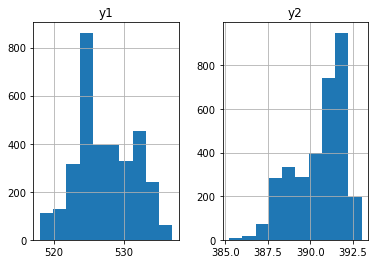

In [20]:
sal.hist() # bimodal
sal1=sal.copy()
sal2=sal.copy()

In [21]:
from scipy.stats import boxcox
import matplotlib.pyplot as plt

0   -0.067591
dtype: float64

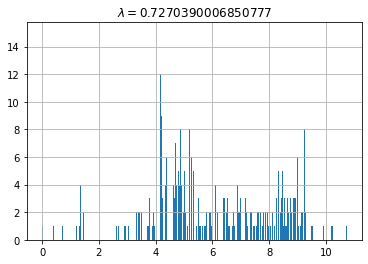

In [22]:
Y1=sal2['y1']-min(sal2['y1'])+1
y_1,l=boxcox(Y1)

plt.hist(y_1,bins=3287)
plt.grid()
plt.title('$\lambda=$'+str(l))
pd.DataFrame(y_1).skew()


0   -0.284757
dtype: float64

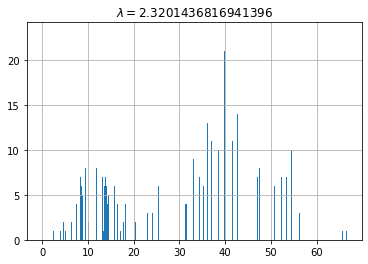

In [23]:
Y2=sal2['y2']-min(sal2['y2'])+1
y_2,l=boxcox(Y2)

plt.hist(y_2,bins=3287)
plt.grid()
plt.title('$\lambda=$'+str(l))
pd.DataFrame(y_2).skew()



In [24]:
sal2['y_1'],sal2['y_2']= y_1,y_2
sal2

,Fecha,y1,y2,y_1,y_2
0,01-01-06,532.88,391.88,8.893068,48.100403
1,02-01-06,532.87,392.02,8.888366,50.183239
2,03-01-06,532.80,391.00,8.855432,36.133307
3,04-01-06,532.72,391.47,8.817744,42.285222
4,05-01-06,532.70,391.66,8.808314,44.927584
...,...,...,...,...,...
3282,27-12-14,531.64,391.91,8.303683,48.542535
3283,28-12-14,531.63,391.99,8.298876,49.732722
3284,29-12-14,531.63,392.91,8.298876,64.603809
3285,30-12-14,531.64,391.05,8.303683,36.761978


### 2.- Discretizar por año estas variables sin transformar.

In [25]:
import datetime 
sal1['Año']= pd.DatetimeIndex(sal1['Fecha']).year
sal1['Año']

0       2006
1       2006
2       2006
3       2006
4       2006
        ... 
3282    2014
3283    2014
3284    2014
3285    2014
3286    2014
Name: Año, Length: 3287, dtype: int64

In [26]:
sal3=sal1.copy()
sal3

,Fecha,y1,y2,Año
0,01-01-06,532.88,391.88,2006
1,02-01-06,532.87,392.02,2006
2,03-01-06,532.80,391.00,2006
3,04-01-06,532.72,391.47,2006
4,05-01-06,532.70,391.66,2006
...,...,...,...,...
3282,27-12-14,531.64,391.91,2014
3283,28-12-14,531.63,391.99,2014
3284,29-12-14,531.63,392.91,2014
3285,30-12-14,531.64,391.05,2014


### 3.- Transformar cada variable discretizada usando boxcox y comparar el histograma de ésta con la variable discretizada sin transformar.

In [27]:
from scipy import stats

sal4=sal3.copy()
sal4

,Fecha,y1,y2,Año
0,01-01-06,532.88,391.88,2006
1,02-01-06,532.87,392.02,2006
2,03-01-06,532.80,391.00,2006
3,04-01-06,532.72,391.47,2006
4,05-01-06,532.70,391.66,2006
...,...,...,...,...
3282,27-12-14,531.64,391.91,2014
3283,28-12-14,531.63,391.99,2014
3284,29-12-14,531.63,392.91,2014
3285,30-12-14,531.64,391.05,2014


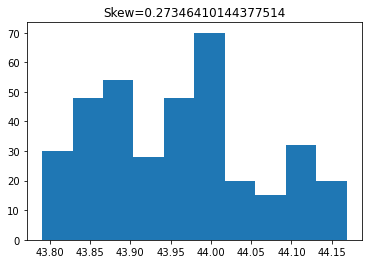

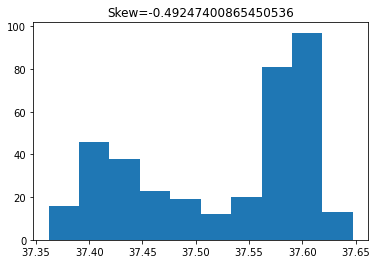

In [28]:
y1_2006 = sal4.groupby('Año')['y1'].get_group(2006)
y1_06=stats.boxcox(y1_2006,lmbda=0.5)
plt.hist(y1_06, label='y1_06')
plt.title('Skew='+str(stats.skew(y1_06)))
plt.show()

y2_2006 = sal4.groupby('Año')['y2'].get_group(2006)
y2_06=stats.boxcox(y2_2006,lmbda=0.5)
plt.hist(y2_06, label='y2_06')
plt.title('Skew='+str(stats.skew(y2_06)))
plt.show()

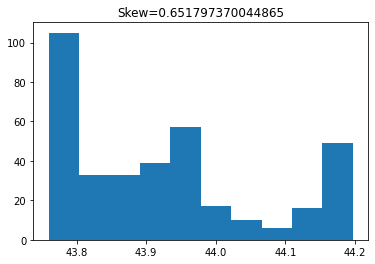

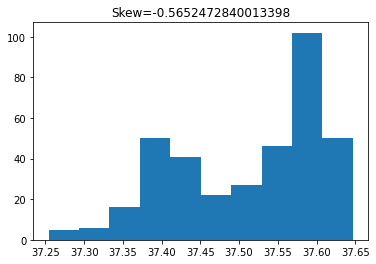

In [29]:
y1_2007 = sal4.groupby('Año')['y1'].get_group(2007)
y1_07=stats.boxcox(y1_2007,lmbda=0.5)
plt.hist(y1_07, label='y1_07')
plt.title('Skew='+str(stats.skew(y1_07)))
plt.show()

y2_2007 = sal4.groupby('Año')['y2'].get_group(2007)
y2_07=stats.boxcox(y2_2007,lmbda=0.5)
plt.hist(y2_07, label='y2_07')
plt.title('Skew='+str(stats.skew(y2_07)))
plt.show()

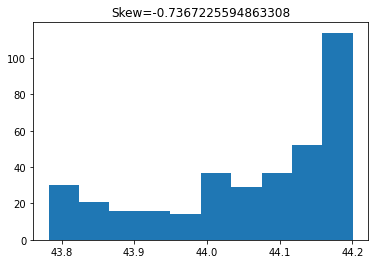

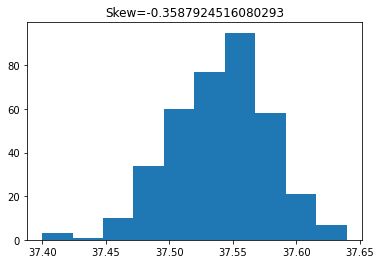

In [30]:
y1_2008 = sal4.groupby('Año')['y1'].get_group(2008)
y1_08=stats.boxcox(y1_2008,lmbda=0.5)
plt.hist(y1_08, label='y1_08')
plt.title('Skew='+str(stats.skew(y1_08)))
plt.show()

y2_2008 = sal4.groupby('Año')['y2'].get_group(2008)
y2_08=stats.boxcox(y2_2008,lmbda=0.5)
plt.hist(y2_08, label='y2_08')
plt.title('Skew='+str(stats.skew(y2_08)))
plt.show()

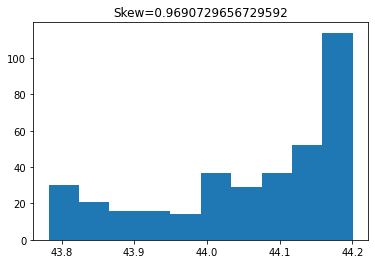

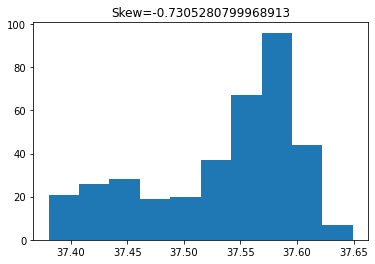

In [31]:
y1_2009 = sal4.groupby('Año')['y1'].get_group(2009)
y1_09=stats.boxcox(y1_2009,lmbda=0.5)
plt.hist(y1_08, label='y1_09')
plt.title('Skew='+str(stats.skew(y1_09)))
plt.show()

y2_2009 = sal4.groupby('Año')['y2'].get_group(2009)
y2_09=stats.boxcox(y2_2009,lmbda=0.5)
plt.hist(y2_09, label='y2_09')
plt.title('Skew='+str(stats.skew(y2_09)))
plt.show()

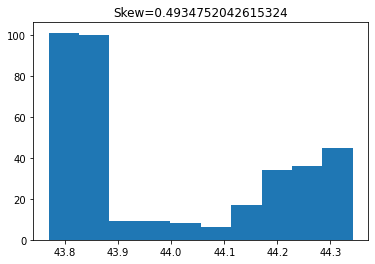

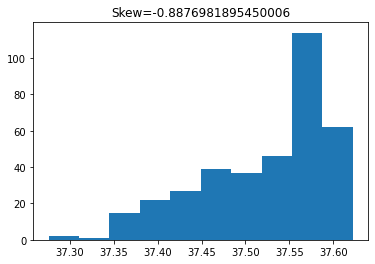

In [32]:
y1_2010 = sal4.groupby('Año')['y1'].get_group(2010)
y1_10=stats.boxcox(y1_2010,lmbda=0.5)
plt.hist(y1_10, label='y1_10')
plt.title('Skew='+str(stats.skew(y1_10)))
plt.show()

y2_2010 = sal4.groupby('Año')['y2'].get_group(2010)
y2_10=stats.boxcox(y2_2010,lmbda=0.5)
plt.hist(y2_10, label='y2_10')
plt.title('Skew='+str(stats.skew(y2_10)))
plt.show()

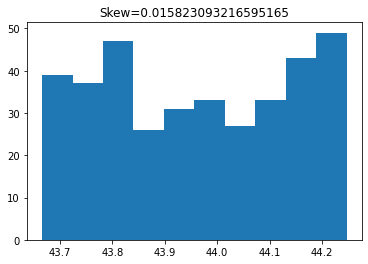

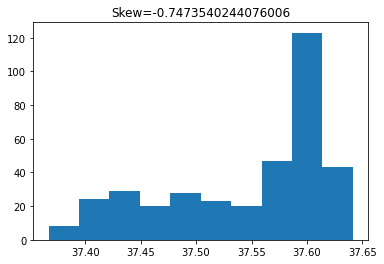

In [33]:
y1_2011 = sal4.groupby('Año')['y1'].get_group(2011)
y1_11=stats.boxcox(y1_2011,lmbda=0.5)
plt.hist(y1_11, label='y1_11')
plt.title('Skew='+str(stats.skew(y1_11)))
plt.show()

y2_2011 = sal4.groupby('Año')['y2'].get_group(2011)
y2_11=stats.boxcox(y2_2011,lmbda=0.5)
plt.hist(y2_11, label='y2_11')
plt.title('Skew='+str(stats.skew(y2_11)))
plt.show()

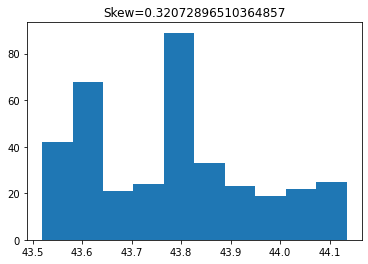

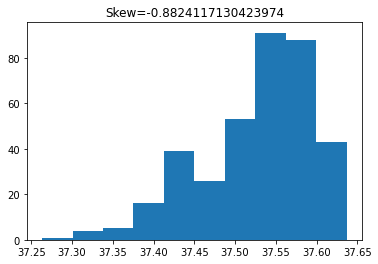

In [34]:
y1_2012 = sal4.groupby('Año')['y1'].get_group(2012)
y1_12=stats.boxcox(y1_2012,lmbda=0.5)
plt.hist(y1_12, label='y1_12')
plt.title('Skew='+str(stats.skew(y1_12)))
plt.show()

y2_2012 = sal4.groupby('Año')['y2'].get_group(2012)
y2_12=stats.boxcox(y2_2012,lmbda=0.5)
plt.hist(y2_12, label='y2_12')
plt.title('Skew='+str(stats.skew(y2_12)))
plt.show()

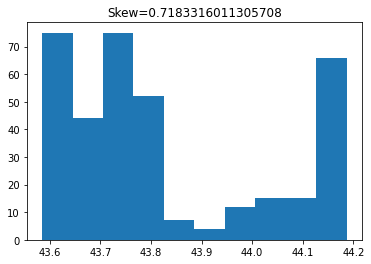

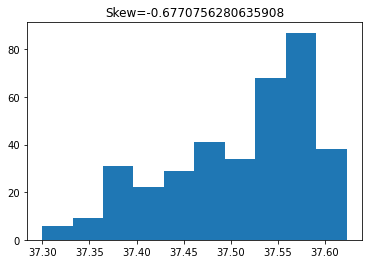

In [35]:
y1_2013 = sal4.groupby('Año')['y1'].get_group(2013)
y1_13=stats.boxcox(y1_2013,lmbda=0.5)
plt.hist(y1_13, label='y1_13')
plt.title('Skew='+str(stats.skew(y1_13)))
plt.show()

y2_2013 = sal4.groupby('Año')['y2'].get_group(2013)
y2_13=stats.boxcox(y2_2013,lmbda=0.5)
plt.hist(y2_13, label='y2_13')
plt.title('Skew='+str(stats.skew(y2_13)))
plt.show()

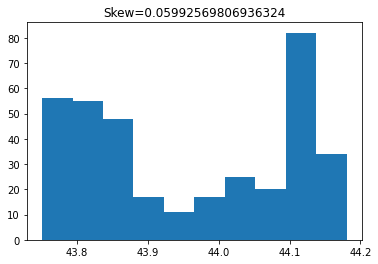

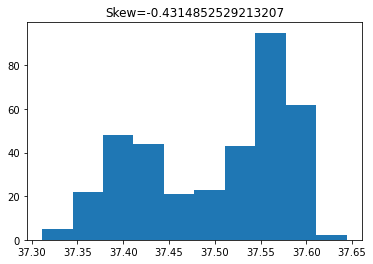

In [36]:
y1_2014 = sal4.groupby('Año')['y1'].get_group(2014)
y1_14=stats.boxcox(y1_2014,lmbda=0.5)
plt.hist(y1_14, label='y1_14')
plt.title('Skew='+str(stats.skew(y1_14)))
plt.show()

y2_2014 = sal4.groupby('Año')['y2'].get_group(2014)
y2_14=stats.boxcox(y2_2014,lmbda=0.5)
plt.hist(y2_14, label='y2_14')
plt.title('Skew='+str(stats.skew(y2_14)))
plt.show()

### 4.- Proponga una discretización con intervalo de ancho constante que, al transformar cada contenedor, se asemeje más a una distribución normal.


In [37]:
sal5=sal.copy()

sal5['disc_y1']=pd.cut(sal5['y1'],20,include_lowest=True)
sal5['disc_y2']=pd.cut(sal5['y2'],20,include_lowest=True)
sal5

,Fecha,y1,y2,disc_y1,disc_y2
0,01-01-06,532.88,391.88,"(532.175, 533.12]","(391.85, 392.24]"
1,02-01-06,532.87,392.02,"(532.175, 533.12]","(391.85, 392.24]"
2,03-01-06,532.80,391.00,"(532.175, 533.12]","(390.68, 391.07]"
3,04-01-06,532.72,391.47,"(532.175, 533.12]","(391.46, 391.85]"
4,05-01-06,532.70,391.66,"(532.175, 533.12]","(391.46, 391.85]"
...,...,...,...,...,...
3282,27-12-14,531.64,391.91,"(531.23, 532.175]","(391.85, 392.24]"
3283,28-12-14,531.63,391.99,"(531.23, 532.175]","(391.85, 392.24]"
3284,29-12-14,531.63,392.91,"(531.23, 532.175]","(392.63, 393.02]"
3285,30-12-14,531.64,391.05,"(531.23, 532.175]","(390.68, 391.07]"


In [38]:
sal5.groupby('disc_y1')['y1'].count(), sal5.groupby('disc_y1')['y1'].count()

(disc_y1
 (517.98, 518.945]     27
 (518.945, 519.89]     85
 (519.89, 520.835]     70
 (520.835, 521.78]     55
 (521.78, 522.725]    103
 (522.725, 523.67]    220
 (523.67, 524.615]    466
 (524.615, 525.56]    394
 (525.56, 526.505]    229
 (526.505, 527.45]    163
 (527.45, 528.395]    210
 (528.395, 529.34]    185
 (529.34, 530.285]    180
 (530.285, 531.23]    148
 (531.23, 532.175]    224
 (532.175, 533.12]    229
 (533.12, 534.065]    186
 (534.065, 535.01]     51
 (535.01, 535.955]     32
 (535.955, 536.9]      30
 Name: y1, dtype: int64,
 disc_y1
 (517.98, 518.945]     27
 (518.945, 519.89]     85
 (519.89, 520.835]     70
 (520.835, 521.78]     55
 (521.78, 522.725]    103
 (522.725, 523.67]    220
 (523.67, 524.615]    466
 (524.615, 525.56]    394
 (525.56, 526.505]    229
 (526.505, 527.45]    163
 (527.45, 528.395]    210
 (528.395, 529.34]    185
 (529.34, 530.285]    180
 (530.285, 531.23]    148
 (531.23, 532.175]    224
 (532.175, 533.12]    229
 (533.12, 534.065]   

### 5.- Discretizar cada variable (sin transformar) usando k-means. Proponga el valor de k y justifíquelo.


In [39]:
sal6=sal.copy()
k=20
from sklearn.preprocessing import KBinsDiscretizer 
dist=KBinsDiscretizer(n_bins=k,strategy='kmeans',encode='ordinal')

In [40]:
sal6['y1_KBins']=dist.fit_transform(sal6[['y1']])
sal6['y2_KBins']=dist.fit_transform(sal6[['y2']])

sal6

,Fecha,y1,y2,y1_KBins,y2_KBins
0,01-01-06,532.88,391.88,15.0,17.0
1,02-01-06,532.87,392.02,15.0,17.0
2,03-01-06,532.80,391.00,15.0,14.0
3,04-01-06,532.72,391.47,15.0,15.0
4,05-01-06,532.70,391.66,15.0,16.0
...,...,...,...,...,...
3282,27-12-14,531.64,391.91,14.0,17.0
3283,28-12-14,531.63,391.99,14.0,17.0
3284,29-12-14,531.63,392.91,14.0,19.0
3285,30-12-14,531.64,391.05,14.0,14.0


la diferencia entre los numeros es chica, por lo que se elegio mantener la K en 20 grupos

In [41]:
#se aprecia la discretizacion por medio de kmeans
K1=sal6.groupby('y1_KBins')['y1'].count()
K2=sal6.groupby('y2_KBins')['y2'].count()
K1,K2

(y1_KBins
 0.0      32
 1.0      95
 2.0      70
 3.0      86
 4.0     141
 5.0     306
 6.0     279
 7.0     301
 8.0     283
 9.0     182
 10.0    227
 11.0    197
 12.0    193
 13.0    170
 14.0    215
 15.0    202
 16.0    189
 17.0     57
 18.0     30
 19.0     32
 Name: y1, dtype: int64,
 y2_KBins
 0.0       4
 1.0       5
 2.0      10
 3.0      17
 4.0      55
 5.0      68
 6.0     130
 7.0     157
 8.0     146
 9.0     131
 10.0    140
 11.0    171
 12.0    211
 13.0    258
 14.0    307
 15.0    367
 16.0    369
 17.0    392
 18.0    269
 19.0     80
 Name: y2, dtype: int64)

### 6.- Transformar cada variable discretizada usando boxcox y comparar la variable discretizada sin transformar mediante el histograma. ¿Hubo mejoría con respecto a la discretización por año?


In [42]:
sal6.groupby('y1_KBins')['y1'].get_group(7.0)

135     525.24
136     525.16
137     525.08
138     525.00
139     524.92
         ...  
3176    524.59
3177    524.78
3178    524.95
3179    525.11
3180    525.28
Name: y1, Length: 301, dtype: float64

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSubplo

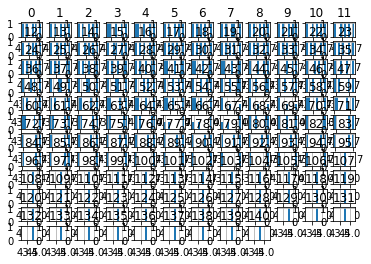

In [49]:
y1_trans=[]
group1=0
for _ in sal6:
    y1g = sal6.groupby('y1_KBins')['y1'].get_group(group1)
    y1_g=stats.boxcox(y1g,lmbda=0.5)
    y1_trans.append(y1_g)
    group1 += 1
y1_trans=pd.DataFrame(y1_trans)
y1_trans.hist()

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>],
       [<AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>],
       [<AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>],
       [<AxesSubplot:title={'center':'21'}>,
        <AxesSubp

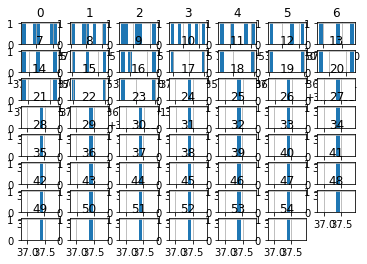

In [48]:
y2_trans=[]
group2=0
for _ in sal6:
    y2g = sal6.groupby('y2_KBins')['y2'].get_group(group2)
    y2_g=stats.boxcox(y2g,lmbda=0.5)
    y2_trans.append(y2_g)
    group2 += 1
y2_trans=pd.DataFrame(y2_trans)
y2_trans.hist()

### 7.- Crear un DataFrame de pandas con los datos de x1, y1 y la agrupación que usted elija (justifique su elección). Hacer lo mismo para los datos x2, y2 y la agrupación elegida.